- By: Alex Kwon
- Email: alex.kwon [at] hudsonthames [dot] org

# Online Portfolio Selection - Pattern Matching

## OLPS Strategies

[**Benchmarks**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Introduction%20to%20Online%20Portfolio%20Selection.ipynb)

[**Momentum**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Momentum.ipynb)

[**Mean Reversion**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Mean%20Reversion.ipynb)

[**Pattern Matching**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Pattern%20Matching.ipynb)

## Abstract

Traditional quantitative strategies such as momentum and mean reversion focus on the directionality of the market trends. The underlying assumption that the immediate past trends will continue is simple but does not always perform the best in real markets. Pattern matching strategies combine the strengths of both by exploiting the statistical correlations of the current market window to the past.

Correlation Driven Nonparametric Learning strategies locate all historical market windows that are statistically correlated and algorithmically selects portfolio weights that maximize the returns. These pattern matching strategies can further be improved by using the top-K selection process for the universal portfolio. By selecting the top-K best-performing strategies each period, the universal portfolio can effectively choose the strategy with the highest returns.

 Symmetric CORN and Functional CORN strategies are further extensions that not only look at similar periods but also inversely correlated periods. As markets tend to have symmetric properties, using both ends of the correlation improves these strategies to maximize returns for similarly performing one but also reduce drawdowns for anticorrelated periods.

**1. Correlation Driven Nonparametric Learning**
   - CORN
   - CORN-U
   - CORN-K
   
**2. Symmetric Correlation Driven Nonparametric Learning**
   - SCORN
   - SCORN-K

**3. Functional Correlation Driven Nonparametric Learning**
   - FCORN
   - FCORN-K
    
**4. Data Exploration**

## 1. Correlation Driven Nonparametric Learning

### 1.1 CORN

Existing strategies attempt to exploit and identify the correlation between different market windows by using the Euclidean distance to measure the similarity between two market windows. However, traditional euclidean distance between windows do not effectively capture the linear or non-linear relation between the two. CorrelationDrivenNonparametricLearning resolves that problem by looking at the correlation coefficients between the two different market windows.

Correlation Driven Nonparametric Learning strategies look at historical market sequences to identify similarly correlated periods. For the correlation, CORN utilizes Pearson product-moment correlation coefficient instead of Euclidean distances to capture the whole market direction.

The similar periods for the strategy can be defined as

CorrelationDrivenNonparametricLearning formally defines a similar set to be one that satisfies the following equation:

$C_t(w,\rho) = \left\lbrace w < i < t+1 \bigg\vert \frac{cov(x^{i-1}_{i-w}, x^t_{t-w+1})}{std(x^{i-1}_{i-w})std(x^t_{t-w+1})} \geq \rho\right\rbrace$, where w is the window size and $\rho$ is the correlation coefficient

$C_t(w,\rho) = \left\lbrace w < i < t+1 \bigg\vert \frac{cov(x^{i-1}_{i-w}, x^t_{t-w+1})}{std(x^{i-1}_{i-w})std(x^t_{t-w+1})} \geq \rho\right\rbrace$

W represents the number of windows to lookback, and $\rho$ is the correlation coefficient threshold.

After gathering results for all the experts, the total portfolio weight will be determined by:

$b_{t+1}=\frac{\sum_{w, \rho}q(w,\rho)S_t(w,\rho)b_{t+1}(w,\rho)}{\sum_{w, \rho}q(w,\rho)S_t(w,\rho)}$

$E(w,\rho) : w \geq 1, -1 \leq \rho \leq 1$

Windows must be at least one, and $\rho$ must be between -1 and 1.

For the specific correlation calculation, each market window of w periods is concatenated to obtain a univariate correlation coefficient between the two windows.

Once all the similar historical periods are identified, the strategy returns weights that will maximize returns for the period. 

$b_{t+1}(w,\rho) = \underset{b \in \Delta_m}{\arg \max} \underset{i \in C_t(w,\rho)}{\prod}(b \cdot x_i)$

### 1.2 CORN-U

The strategy can also take an ensemble approach to reduce variability. One possible CORN ensemble is the CORN-U method.

CORN-U generates a set of experts with different window sizes and the same $\rho$ value. After all the expert's weights are calculated, weights are evenly distributed among all experts to represent the strategy as a universal portfolio.

The U at the end of CorrelationDrivenNonparametricLearning indicates that we will be using a different number of experts for a single portfolio. It is similar to our analysis above, but instead of dividing into each portfolio component, CorrelationDrivenNonparametricLearning-U pools all the wealth of each experts and creates a uniform one.

However, in general, CorrelationDrivenNonparametricLearning-U is not an effective implementation, because of its even weight distribution even to the low-performing experts.

CORN_U takes in a set of window and rho values as its initial parameters.

### 1.3 CORN-K



CorrelationDrivenNonparametricLearning-K improves on the CorrelationDrivenNonparametricLearning-U on the wealth allocation to each experts. The overall portfolio manager chooses an arbitrary number k, where for each time period the top-k best performing experts of the last period get to continue their strategy.

CorrelationDrivenNonparametricLearning-K takes in three parameters. K determines the number of top experts for each time period. Window_values and Rho-values determine the each experts' unique parameters.

We will examine the same set of window and rho values as the above CorrelationDrivenNonparametricLearning-U strategy, and we will choose the top 2 experts to allocate our wealth.

CORN strategies can also utilize ensemble methods to improve the performance. One possible capital allocation method is top-k experts.

For each time period, the strategy chooses the top-k experts from the previous period and equally allocates weight among those strategies. By diversifying your capital and reducing your variation, the strategy greatly improves on its performances.

## 2. Symmetric Correlation Driven Nonparametric Learning

CorrelationDrivenNonparametricLearning-K is based on CorrelationDrivenNonparametricLearning which looks periods of similar correlation. However, there is another perspetive in that markets are symmetrical. Some market windows might have high negative correlation. To this problem, we can formulate our problem to minimize the downsides formed in those negatively correlated periods.

Extending from the existing CORN strategies, Symmetric Correlation Driven Nonparametric Learning not only looks at the similar periods but also the inversely correlated periods as well.

It tracks the positively correlated windows with

$C(x_t;w,\rho) = \lbrace x_j \vert R(X^{j-1}_{j-2},X^{t-1}_{t-w})  > \rho)$

And the negatively correlated windows with

$C'(x_t;w,\rho) = \lbrace x_j \vert R(X^{j-1}_{j-2},X^{t-1}_{t-w})  < -\rho)$

They therfore maximize the following

$b^{\bf{\star}}_t(w,\rho) = \underset{b \in \Delta_m}{\arg\max} \underset{x \in C(x_t;w,\rho)}{\sum}\log b^{\top}x - \underset{x \in C'(x_t;w,\rho)}{\sum}\log b^{\top}x$

## 3. Functional Correlation Driven Nonparametric Learning

FCORN-K is an extension of the SCORN-K algorithm. Instead of completely discounting windows with correlation that is less than a certain value, FCORN-K smoothes out the activation function for the log returns.

Consider an activation function

$b^{\bf{\star}}_t(w,\rho) = \underset{b \in \Delta_m}{\arg\max} \underset{j \in \lbrace1,...,t-1\rbrace}{\sum}v(j)\log b^{\top}x_i$

If the correlation is nonnegative

$\text{if} \: c \geq 0 \rightarrow v(j) =  \frac{1}{1 + \exp(-\lambda(c-\rho))}$

If the correlation is negative

$\text{if} \: c < 0 \rightarrow v(j) =  \frac{1}{1 + \exp(-\lambda(c+\rho))} - 1$

In [223]:
import pandas as pd
import numpy as np
import pickle
import optuna
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots 
from mlfinlab.online_portfolio_selection import *
pio.renderers.default = "browser" # Toggle for GitHub rendering

## Import Data

More information on these datasets is available [here](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Data%20Selection.ipynb).

In [2]:
msci = pd.read_csv('data/MSCI.csv', parse_dates=True, index_col='Date').dropna()[1:]
us_equity = pd.read_csv('data/US_Equity.csv', parse_dates=True, index_col='Date')
djia = pd.read_csv('data/DJIA.csv', parse_dates=True, index_col='Date')
nyse = pd.read_csv('data/NYSE.csv', parse_dates=True, index_col='Date')
sp500 = pd.read_csv('data/SP500.csv', parse_dates=True, index_col='Date')
tse = pd.read_csv('data/TSE.csv', parse_dates=True, index_col='Date')

## 5.1 NYSE: 1961-1984

In [180]:
# Load Optuna Study.
nyse_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/nyse.db')
nyse_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/nyse.db')
nyse_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/nyse.db')
nyse_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/nyse.db')

### CORN

In [224]:
fig = optuna.visualization.plot_slice(nyse_corn)
fig.update_layout(title_text="NYSE CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

fig = optuna.visualization.plot_slice(nyse_cornu)
fig.update_layout(title_text="NYSE CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### CORN-K

In [182]:
with open('pickled/nyse_cornk.pickle', 'rb') as f:
    nyse_cornk = pickle.load(f)
nyse_cornk = pd.DataFrame(nyse_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [183]:
nyse_cornk.head()

Window  Rho    K       Returns
3       1.0  3.0  1.0  6.134229e+13
79      3.0  5.0  5.0  5.766608e+13
78      3.0  5.0  4.0  5.538836e+13
21      2.0  3.0  1.0  4.810431e+13
134     4.0  5.0  5.0  4.797495e+13

In [273]:
def plot_k(data, title):
    fig = go.Figure(data=[go.Scatter3d(x=data['Window'], y=data['Rho'], z=data['K'], mode='markers',
    marker=dict(size=8, color=data['Returns'], colorscale='blues', opacity=0.7))])

    fig.update_layout(scene=dict(xaxis=dict(title_text='Window', tick0=1, dtick=1),
                                 yaxis=dict(title_text='Rho', tick0=1, dtick=1),
                                 zaxis=dict(title_text='K', tick0=0, dtick=1)))
    camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
    fig.update_layout(scene_camera=camera, title=title)
    fig.show()

In [276]:
temp = nyse_cornk[nyse_cornk['K'] < 6]

In [277]:
plot_k(temp, "NYSE CORNK Window of [1, 5] and Rho of [1, 5]")

In [272]:
plot_k(nyse_cornk, "NYSE CORNK Window of [1, 5] and Rho of [1, 5]")

In [184]:
nyse_cornk_ = CorrelationDrivenNonparametricLearningK(window=1, rho=3, k=1)
nyse_cornk_.allocate(nyse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


### SCORN

In [225]:
fig = optuna.visualization.plot_slice(nyse_scorn)
fig.update_layout(title_text="NYSE SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### SCORN-K

In [186]:
with open('pickled/nyse_scornk.pickle', 'rb') as f:
    nyse_scornk = pickle.load(f)
nyse_scornk = pd.DataFrame(nyse_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [187]:
nyse_scornk.head()

Window  Rho    K       Returns
65     3.0  4.0  3.0  1.882506e+15
49     3.0  2.0  2.0  1.484575e+15
93     4.0  1.0  4.0  1.435646e+15
47     3.0  1.0  3.0  1.397954e+15
28     2.0  4.0  2.0  1.360741e+15

In [226]:
fig = go.Figure(data=[go.Scatter3d(x=nyse_scornk['Window'], y=nyse_scornk['Rho'], z=nyse_scornk['K'], mode='markers',
    marker=dict(size=8, color=nyse_scornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis=dict(title_text='Window', tick0=1, dtick=1),
                             yaxis=dict(title_text='Rho', tick0=1, dtick=1),
                             zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="NYSE SCORNK Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [49]:
nyse_scornk_ = SymmetricCorrelationDrivenNonparametricLearningK(window=3, rho=4, k=3)
nyse_scornk_.allocate(nyse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [50]:
with open('pickled/nyse_scornk_.pickle', 'wb') as fout:
    pickle.dump(nyse_scornk_, fout)

### FCORN

In [228]:
fig = optuna.visualization.plot_slice(nyse_fcorn)
fig.update_layout(title_text="NYSE FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

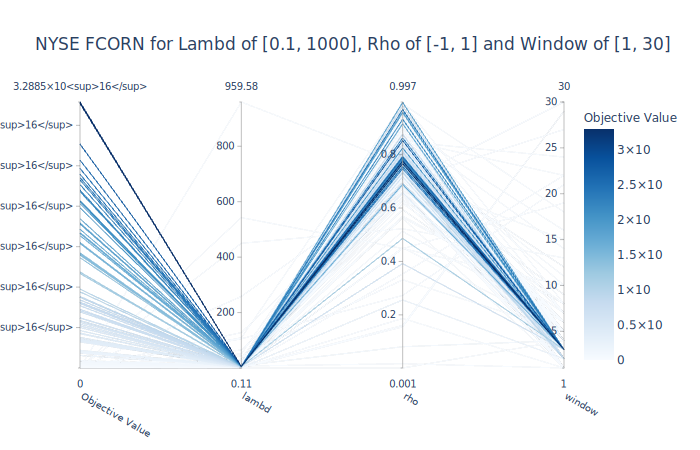

In [42]:
fig = optuna.visualization.plot_parallel_coordinate(nyse_fcorn)
fig.update_layout(title_text="NYSE FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### FCORN-K

In [46]:
nyse_fcornk = FunctionalCorrelationDrivenNonparametricLearningK(window=3, rho=4, lambd=1, k=3)
nyse_fcornk.allocate(nyse, verbose=True)

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [48]:
with open('pickled/nyse_fcornk.pickle', 'wb') as fout:
    pickle.dump(nyse_fcornk, fout)

In [188]:
# Buy and Hold.
nyse_bah = BuyAndHold()
nyse_bah.allocate(nyse)

# Constant Rebalanced Portfolio.
nyse_crp = ConstantRebalancedPortfolio()
nyse_crp.allocate(nyse)

In [189]:
# CORN.
nyse_corn_ = CorrelationDrivenNonparametricLearning(window=nyse_corn.best_params['window'], rho=nyse_corn.best_params['rho'])

# CORN-U.
nyse_cornu_ = CorrelationDrivenNonparametricLearningUniform(window=nyse_cornu.best_params['window'], rho=nyse_cornu.best_params['rho'])

# SCORN.
nyse_scorn_ = SymmetricCorrelationDrivenNonparametricLearning(window=nyse_scorn.best_params['window'], rho=nyse_scorn.best_params['rho'])

# FCORN.
nyse_fcorn_ = FunctionalCorrelationDrivenNonparametricLearning(window=nyse_fcorn.best_params['window'], rho=nyse_fcorn.best_params['rho'], lambd=nyse_fcorn.best_params['lambd'])

In [190]:
# Allocate weights.
nyse_corn_.allocate(nyse)
nyse_cornu_.allocate(nyse)
nyse_scorn_.allocate(nyse)
nyse_fcorn_.allocate(nyse)

In [231]:
fig = go.Figure()
idx = nyse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=nyse_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=nyse_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=nyse_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=nyse_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=nyse_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=nyse_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on NYSE', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

In [234]:
fig = go.Figure()
idx = nyse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=nyse_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=nyse_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=nyse_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=nyse_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on NYSE', xaxis_title='Date', yaxis_title='Relative Returns', yaxis_type="log")
fig.show()

In [236]:
fig = go.Figure()
idx = nyse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=nyse_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=nyse_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=nyse_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=nyse_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on NYSE', xaxis_title='Date', yaxis_title='Relative Returns', yaxis_type="log")
fig.show()

## 5.2 DJIA: 2001-2003

In [192]:
# Load Optuna Study.
djia_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/djia.db')
djia_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/djia.db')
djia_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/djia.db')
djia_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/djia.db')

### CORN

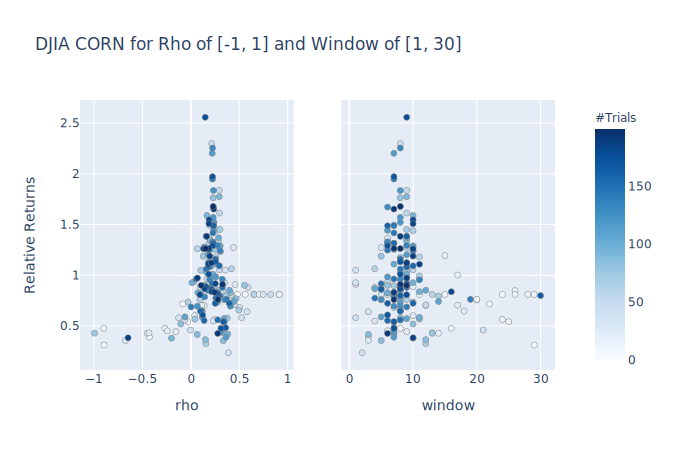

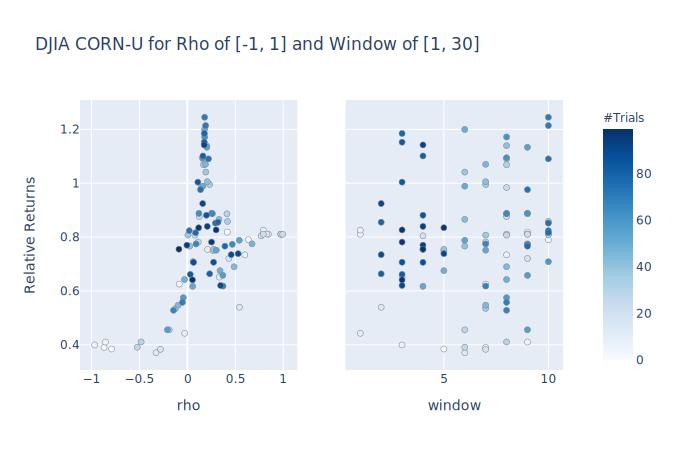

In [193]:
fig = optuna.visualization.plot_slice(djia_corn)
fig.update_layout(title_text="DJIA CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

fig = optuna.visualization.plot_slice(djia_cornu)
fig.update_layout(title_text="DJIA CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### CORN-K

In [194]:
with open('pickled/djia_cornk.pickle', 'rb') as fout:
    djia_cornk = pickle.load(fout)
djia_cornk = pd.DataFrame(djia_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [195]:
djia_cornk.head()

Window  Rho    K   Returns
36      2.0  5.0  2.0  1.256950
202     5.0  5.0  3.0  1.206102
76      3.0  5.0  2.0  1.152687
131     4.0  5.0  2.0  1.134682
10      1.0  5.0  1.0  1.128681

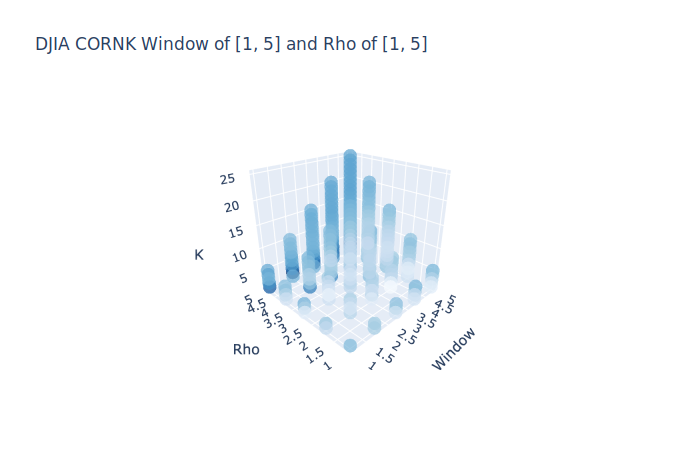

In [165]:
fig = go.Figure(data=[go.Scatter3d(x=djia_cornk['Window'], y=djia_cornk['Rho'], z=djia_cornk['K'], mode='markers',
    marker=dict(size=8, color=djia_cornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis_title='Window', yaxis_title='Rho', zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="DJIA CORNK Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [57]:
djia_cornk_ = CorrelationDrivenNonparametricLearningK(window=2, rho=5, k=2)
djia_cornk_.allocate(djia, verbose=True)

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



Progress: |██████████████████████████████████████████████████| 100.0% Complete


### SCORN

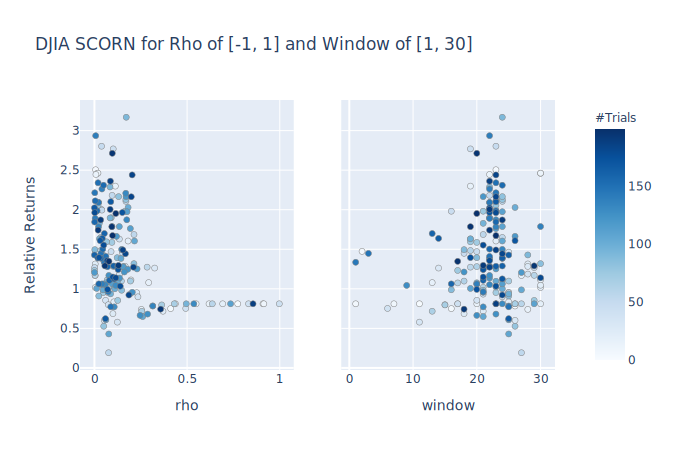

In [58]:
fig = optuna.visualization.plot_slice(djia_scorn)
fig.update_layout(title_text="DJIA SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### SCORN-K

In [60]:
with open('pickled/djia_scornk.pickle', 'rb') as fout:
    djia_scornk = pickle.load(fout)
djia_scornk = pd.DataFrame(djia_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [61]:
djia_scornk.head()

Window  Rho    K   Returns
0      1.0  1.0  1.0  2.095896
1      1.0  2.0  1.0  2.029591
10     1.0  5.0  1.0  1.844303
6      1.0  4.0  1.0  1.789960
3      1.0  3.0  1.0  1.773378

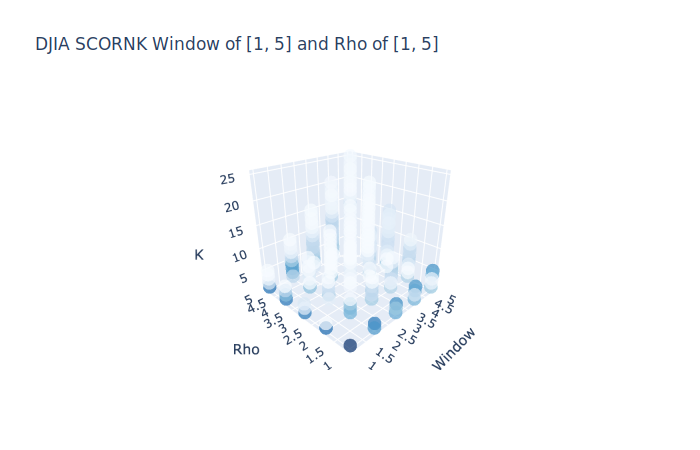

In [164]:
fig = go.Figure(data=[go.Scatter3d(x=djia_scornk['Window'], y=djia_scornk['Rho'], z=djia_scornk['K'], mode='markers',
    marker=dict(size=8, color=nyse_scornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis_title='Window', yaxis_title='Rho', zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="DJIA SCORNK Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [62]:
djia_scornk_ = SymmetricCorrelationDrivenNonparametricLearningK(window=1, rho=1, k=1)
djia_scornk_.allocate(djia, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


### FCORN

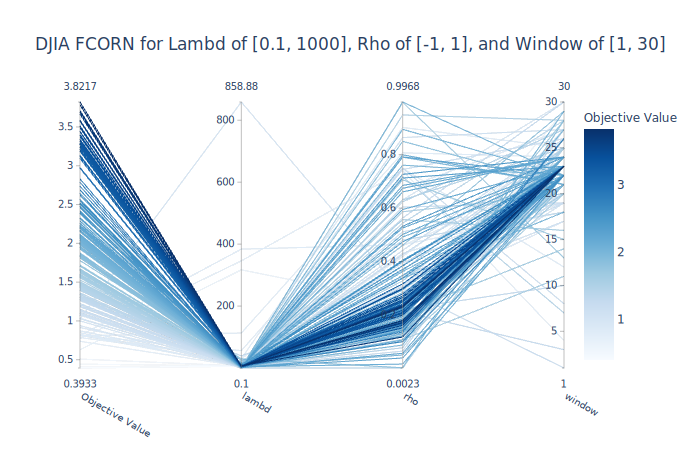

In [64]:
fig = optuna.visualization.plot_parallel_coordinate(djia_fcorn)
fig.update_layout(title_text="DJIA FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### FCORN-K

In [65]:
djia_fcornk = FunctionalCorrelationDrivenNonparametricLearningK(window=1, rho=1, lambd=1, k=1)
djia_fcornk.allocate(djia, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [69]:
# Buy and Hold.
djia_bah = BuyAndHold()
djia_bah.allocate(djia)

# Constant Rebalanced Portfolio.
djia_crp = ConstantRebalancedPortfolio()
djia_crp.allocate(djia)

In [105]:
# CORN.
djia_corn_ = CorrelationDrivenNonparametricLearning(window=djia_corn.best_params['window'], rho=djia_corn.best_params['rho'])

# CORN-U.
djia_cornu_ = CorrelationDrivenNonparametricLearningUniform(window=djia_cornu.best_params['window'], rho=djia_cornu.best_params['rho'])

# SCORN.
djia_scorn_ = SymmetricCorrelationDrivenNonparametricLearning(window=djia_scorn.best_params['window'], rho=djia_scorn.best_params['rho'])

# FCORN.
djia_fcorn_ = FunctionalCorrelationDrivenNonparametricLearning(window=djia_fcorn.best_params['window'], rho=djia_fcorn.best_params['rho'], lambd=djia_fcorn.best_params['lambd'])

In [106]:
# Allocate weights.
djia_corn_.allocate(djia)
djia_cornu_.allocate(djia)
djia_scorn_.allocate(djia)
djia_fcorn_.allocate(djia)

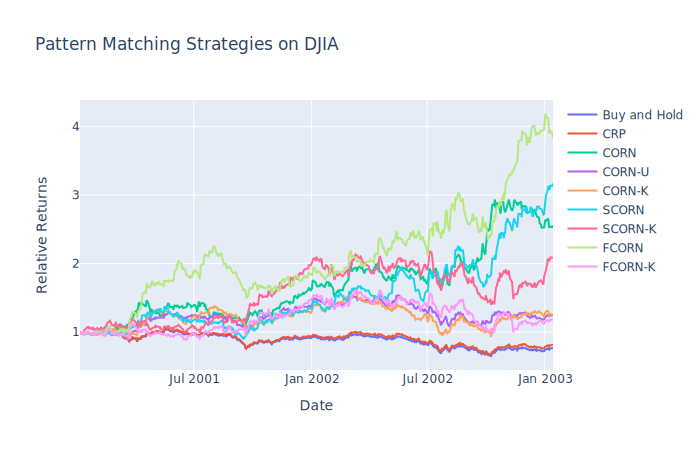

In [107]:
fig = go.Figure()
idx = djia_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=djia_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=djia_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=djia_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=djia_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=djia_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=djia_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=djia_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=djia_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=djia_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on DJIA', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

In [237]:
fig = go.Figure()
idx = djia_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=djia_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=djia_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=djia_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=djia_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=djia_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=djia_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on DJIA', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

Mean reversion strategies perform significantly better than other benchmarks. For a period of a continuous downtrend, OLMAR-2 and RMR each have triple and double returns when most other strategies are stagnant around 1. Mean reversion provides promising returns for a long bear market.

## 5.3 TSE: 1994-1998

In [196]:
# Load Optuna Study.
tse_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/tse.db')
tse_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/tse.db')
tse_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/tse.db')
tse_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/tse.db')

### CORN

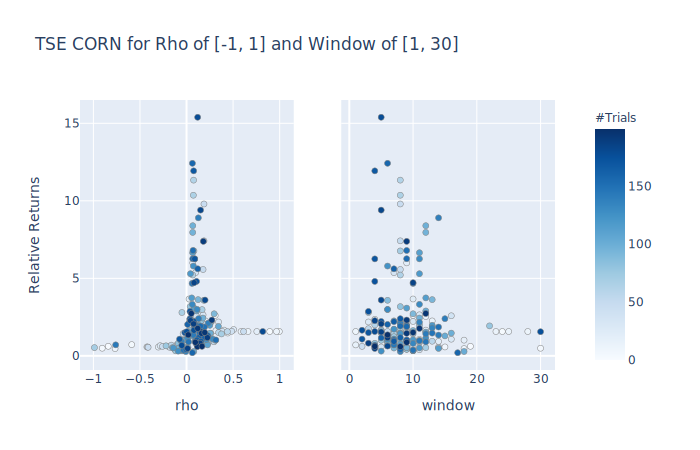

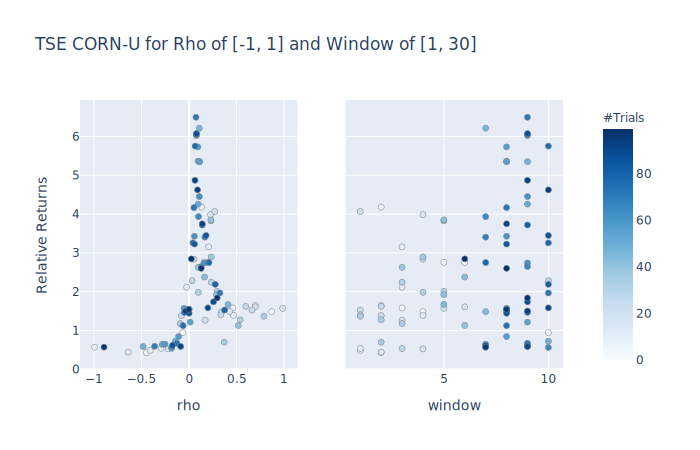

In [197]:
fig = optuna.visualization.plot_slice(tse_corn)
fig.update_layout(title_text="TSE CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

fig = optuna.visualization.plot_slice(tse_cornu)
fig.update_layout(title_text="TSE CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### CORN-K

In [198]:
with open('pickled/tse_cornk.pickle', 'rb') as fout:
    tse_cornk = pickle.load(fout)
tse_cornk = pd.DataFrame(tse_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [199]:
tse_cornk.head()

Window  Rho    K   Returns
0       1.0  1.0  1.0  5.445546
15      2.0  1.0  1.0  4.388148
45      3.0  1.0  1.0  4.303288
90      4.0  1.0  1.0  4.194859
150     5.0  1.0  1.0  3.903613

In [200]:
tse_cornk_ = CorrelationDrivenNonparametricLearningK(window=1, rho=1, k=1)
tse_cornk_.allocate(tse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


### SCORN

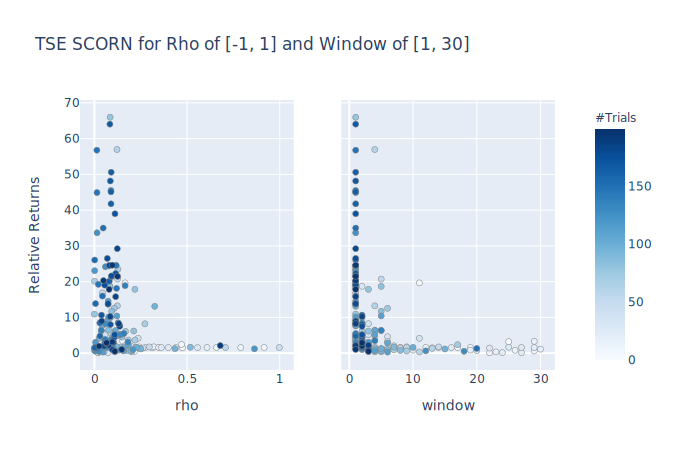

In [77]:
fig = optuna.visualization.plot_slice(tse_scorn)
fig.update_layout(title_text="TSE SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### SCORN-K

In [78]:
with open('pickled/tse_scornk.pickle', 'rb') as fout:
    tse_scornk = pickle.load(fout)
tse_scornk = pd.DataFrame(tse_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [79]:
tse_scornk.head()

Window  Rho    K    Returns
4      1.0  3.0  2.0  20.951052
22     2.0  3.0  2.0  15.209088
46     3.0  1.0  2.0  14.540349
56     3.0  3.0  3.0  14.427613
0      1.0  1.0  1.0  14.332423

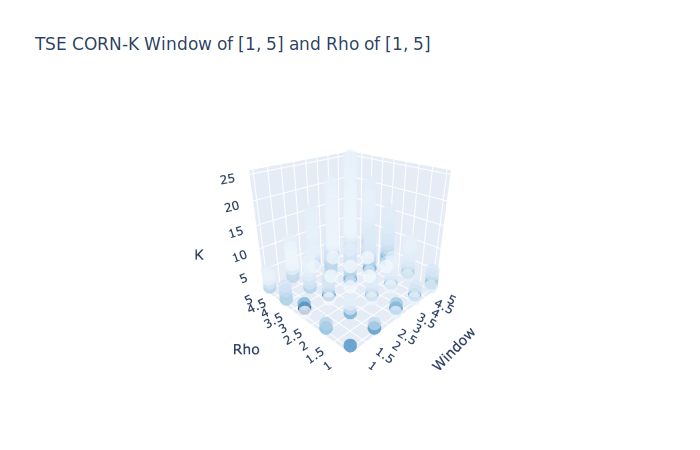

In [169]:
fig = go.Figure(data=[go.Scatter3d(x=tse_scornk['Window'], y=tse_scornk['Rho'], z=tse_scornk['K'], mode='markers',
    marker=dict(size=8, color=tse_scornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis_title='Window', yaxis_title='Rho', zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="TSE CORN-K Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [80]:
tse_scornk_ = SymmetricCorrelationDrivenNonparametricLearningK(window=1, rho=3, k=2)
tse_scornk_.allocate(tse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [81]:
with open('pickled/tse_scornk_.pickle', 'wb') as fout:
    pickle.dump(tse_scornk_, fout)

### FCORN

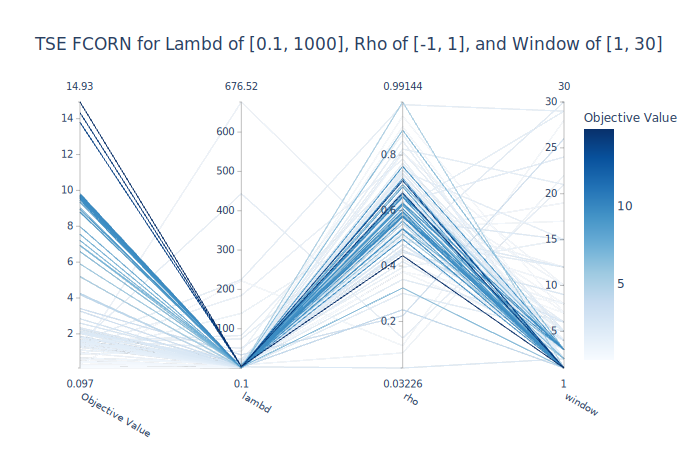

In [82]:
fig = optuna.visualization.plot_parallel_coordinate(tse_fcorn)
fig.update_layout(title_text="TSE FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### FCORN-K

In [83]:
tse_fcornk = FunctionalCorrelationDrivenNonparametricLearningK(window=1, rho=3, lambd=1, k=2)
tse_fcornk.allocate(tse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [84]:
with open('pickled/tse_fcornk.pickle', 'wb') as fout:
    pickle.dump(tse_fcornk, fout)

In [85]:
# Buy and Hold.
tse_bah = BuyAndHold()
tse_bah.allocate(tse)

# Constant Rebalanced Portfolio.
tse_crp = ConstantRebalancedPortfolio()
tse_crp.allocate(tse)

In [201]:
# CORN.
tse_corn_ = CorrelationDrivenNonparametricLearning(window=tse_corn.best_params['window'], rho=tse_corn.best_params['rho'])

# CORN-U.
tse_cornu_ = CorrelationDrivenNonparametricLearningUniform(window=tse_cornu.best_params['window'], rho=tse_cornu.best_params['rho'])

# SCORN.
tse_scorn_ = SymmetricCorrelationDrivenNonparametricLearning(window=tse_scorn.best_params['window'], rho=tse_scorn.best_params['rho'])

# FCORN.
tse_fcorn_ = FunctionalCorrelationDrivenNonparametricLearning(window=tse_fcorn.best_params['window'], rho=tse_fcorn.best_params['rho'], lambd=tse_fcorn.best_params['lambd'])

In [202]:
# Allocate weights.
tse_corn_.allocate(tse)
tse_cornu_.allocate(tse)
tse_scorn_.allocate(tse)
tse_fcorn_.allocate(tse)

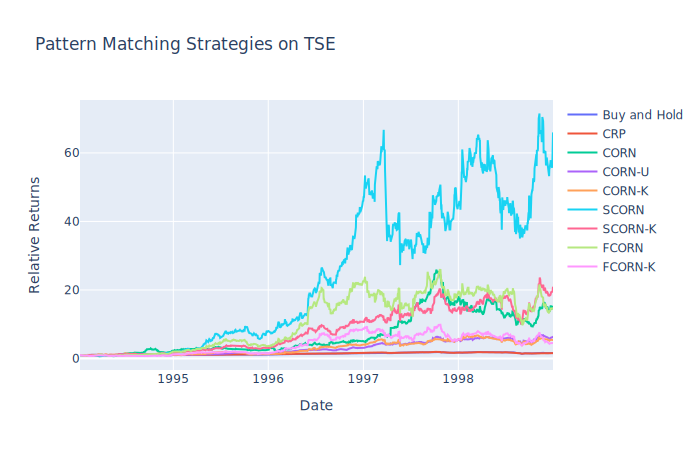

In [203]:
fig = go.Figure()
idx = tse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=tse_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=tse_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=tse_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=tse_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=tse_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=tse_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=tse_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=tse_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=tse_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on TSE', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

In [243]:
fig = go.Figure()
idx = tse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=tse_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=tse_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=tse_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=tse_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=tse_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=tse_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on TSE', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

## SP500: 1998-2003

In [204]:
# Load Optuna Study.
sp500_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/sp500.db')
sp500_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/sp500.db')
sp500_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/sp500.db')
sp500_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/sp500.db')

### CORN

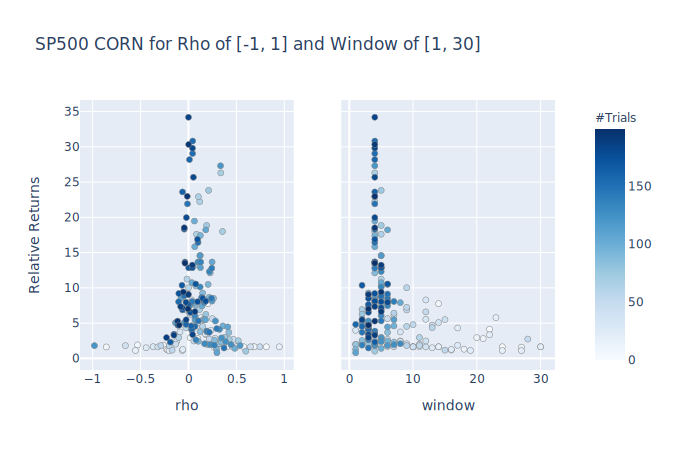

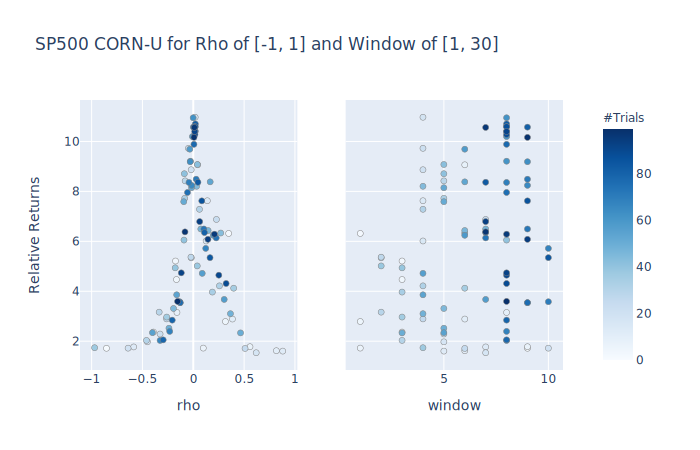

In [205]:
fig = optuna.visualization.plot_slice(sp500_corn)
fig.update_layout(title_text="SP500 CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

fig = optuna.visualization.plot_slice(sp500_cornu)
fig.update_layout(title_text="SP500 CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### CORN-K

In [206]:
with open('pickled/sp500_cornk.pickle', 'rb') as fout:
    sp500_cornk = pickle.load(fout)
sp500_cornk = pd.DataFrame(sp500_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [207]:
sp500_cornk.head()

Window  Rho    K    Returns
90      4.0  1.0  1.0  25.933588
150     5.0  1.0  1.0  23.418687
94      4.0  2.0  1.0  18.556358
103     4.0  3.0  2.0  18.180983
151     5.0  1.0  2.0  17.496739

In [208]:
sp500_cornk_ = CorrelationDrivenNonparametricLearningK(window=4, rho=1, k=1)
sp500_cornk_.allocate(sp500, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


### SCORN

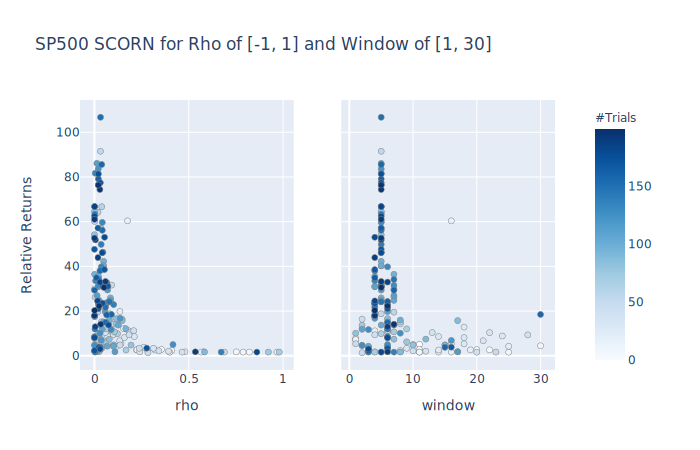

In [209]:
fig = optuna.visualization.plot_slice(sp500_scorn)
fig.update_layout(title_text="SP500 SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### SCORN-K

In [95]:
with open('pickled/sp500_scornk.pickle', 'rb') as fout:
    sp500_scornk = pickle.load(fout)
sp500_scornk = pd.DataFrame(sp500_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [96]:
sp500_scornk.head()

Window  Rho    K    Returns
155     5.0  2.0  1.0  30.569137
150     5.0  1.0  1.0  29.961015
180     5.0  4.0  1.0  24.678792
151     5.0  1.0  2.0  21.236055
181     5.0  4.0  2.0  21.107956

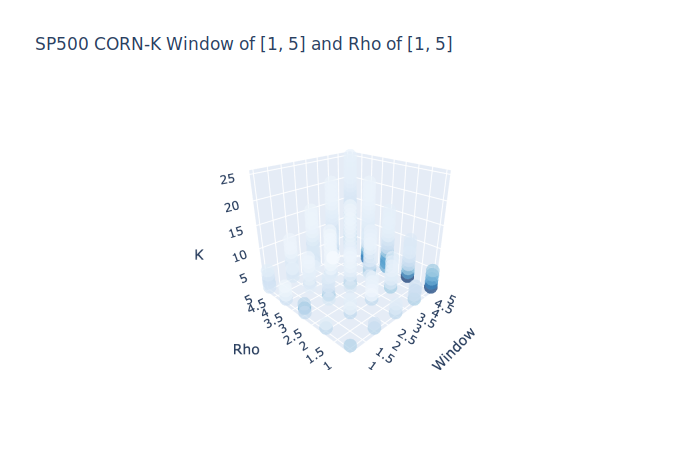

In [171]:
fig = go.Figure(data=[go.Scatter3d(x=sp500_scornk['Window'], y=sp500_scornk['Rho'], z=sp500_scornk['K'], mode='markers',
    marker=dict(size=8, color=sp500_scornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis_title='Window', yaxis_title='Rho', zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="SP500 CORN-K Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [97]:
sp500_scornk_ = SymmetricCorrelationDrivenNonparametricLearningK(window=5, rho=2, k=1)
sp500_scornk_.allocate(sp500, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [98]:
with open('pickled/sp500_scornk_.pickle', 'wb') as fout:
    pickle.dump(sp500_scornk_, fout)

### FCORN

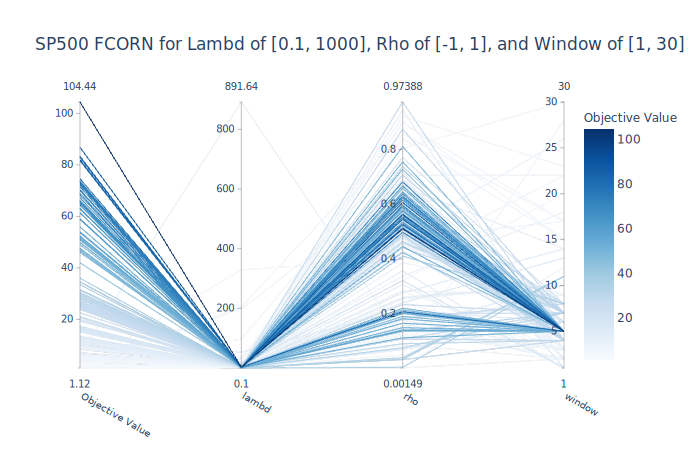

In [99]:
fig = optuna.visualization.plot_parallel_coordinate(sp500_fcorn)
fig.update_layout(title_text="SP500 FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### FCORN-K

In [100]:
sp500_fcornk_ = FunctionalCorrelationDrivenNonparametricLearningK(window=5, rho=2, lambd=1, k=1)
sp500_fcornk_.allocate(sp500, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [101]:
# Buy and Hold.
sp500_bah = BuyAndHold()
sp500_bah.allocate(sp500)

# Constant Rebalanced Portfolio.
sp500_crp = ConstantRebalancedPortfolio()
sp500_crp.allocate(sp500)

In [210]:
# CORN.
sp500_corn_ = CorrelationDrivenNonparametricLearning(window=sp500_corn.best_params['window'], rho=sp500_corn.best_params['rho'])

# CORN-U.
sp500_cornu_ = CorrelationDrivenNonparametricLearningUniform(window=sp500_cornu.best_params['window'], rho=sp500_cornu.best_params['rho'])

# SCORN.
sp500_scorn_ = SymmetricCorrelationDrivenNonparametricLearning(window=sp500_scorn.best_params['window'], rho=sp500_scorn.best_params['rho'])

# FCORN.
sp500_fcorn_ = FunctionalCorrelationDrivenNonparametricLearning(window=sp500_fcorn.best_params['window'], rho=sp500_fcorn.best_params['rho'], lambd=sp500_fcorn.best_params['lambd'])

In [211]:
# Allocate weights.
sp500_corn_.allocate(sp500)
sp500_cornu_.allocate(sp500)
sp500_scorn_.allocate(sp500)
sp500_fcorn_.allocate(sp500)

In [239]:
fig = go.Figure()
idx = sp500_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=sp500_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=sp500_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=sp500_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=sp500_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=sp500_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=sp500_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=sp500_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=sp500_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=sp500_fcornk_.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on SP500', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

In [240]:
fig = go.Figure()
idx = sp500_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=sp500_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=sp500_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=sp500_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=sp500_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=sp500_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=sp500_fcornk_.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on SP500', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

OLMAR-2 and RMR produce the highest returns as the rest of the strategies fail to increase by more than 2 times the original value.

## MSCI: 1993-2020

In [ ]:
# Load Optuna Study.
msci_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/msci.db')
msci_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/msci.db')
msci_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/msci.db')
msci_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/msci.db')

### CORN

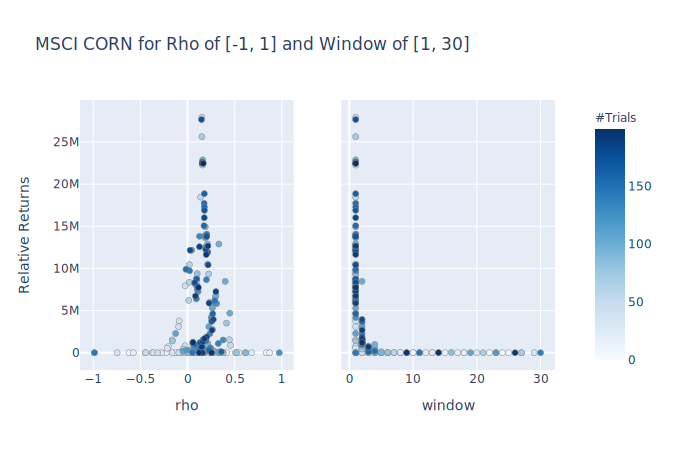

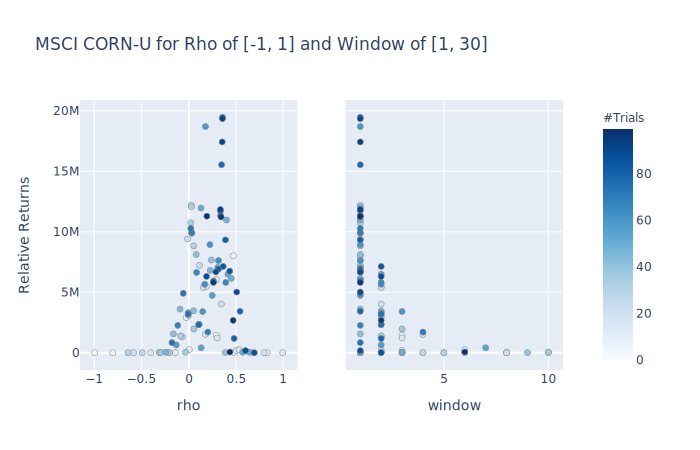

In [109]:
fig = optuna.visualization.plot_slice(msci_corn)
fig.update_layout(title_text="MSCI CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

fig = optuna.visualization.plot_slice(msci_cornu)
fig.update_layout(title_text="MSCI CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### CORN-K

In [110]:
with open('pickled/msci_cornk.pickle', 'rb') as fout:
    msci_cornk = pickle.load(fout)
msci_cornk = pd.DataFrame(msci_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [111]:
msci_cornk.head()

Window  Rho    K       Returns
4      1.0  3.0  2.0  1.032502e+07
2      1.0  2.0  2.0  1.032196e+07
12     1.0  5.0  3.0  9.460062e+06
3      1.0  3.0  1.0  8.776678e+06
7      1.0  4.0  2.0  8.601446e+06

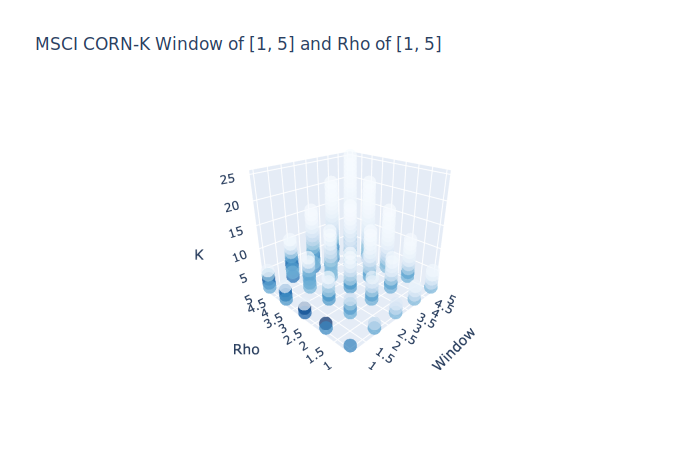

In [172]:
fig = go.Figure(data=[go.Scatter3d(x=msci_cornk['Window'], y=msci_cornk['Rho'], z=msci_cornk['K'], mode='markers',
    marker=dict(size=8, color=msci_cornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis_title='Window', yaxis_title='Rho', zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="MSCI CORN-K Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [116]:
msci_cornk_ = CorrelationDrivenNonparametricLearningK(window=1, rho=3, k=2)
msci_cornk_.allocate(msci, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [117]:
with open('pickled/msci_cornk_.pickle', 'wb') as fout:
    pickle.dump(msci_cornk_, fout)

### SCORN

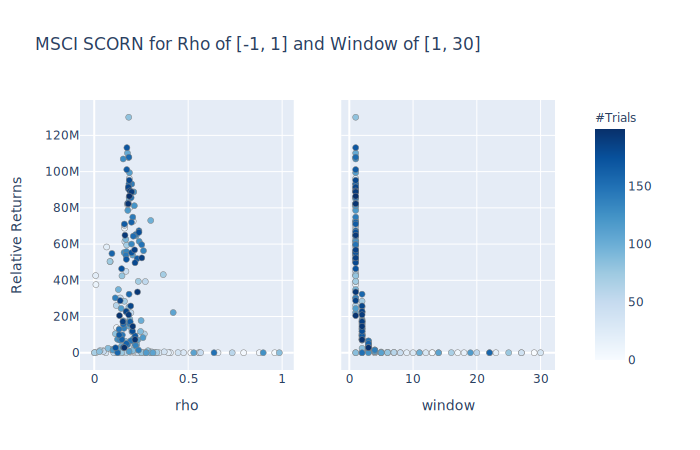

In [113]:
fig = optuna.visualization.plot_slice(msci_scorn)
fig.update_layout(title_text="MSCI SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### SCORN-K

In [114]:
with open('pickled/msci_scornk.pickle', 'rb') as fout:
    msci_scornk = pickle.load(fout)
msci_scornk = pd.DataFrame(msci_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [118]:
msci_scornk.head()

Window  Rho    K       Returns
0      1.0  1.0  1.0  9.755021e+07
45     3.0  1.0  1.0  8.090060e+07
4      1.0  3.0  2.0  7.987394e+07
15     2.0  1.0  1.0  7.975023e+07
11     1.0  5.0  2.0  7.758903e+07

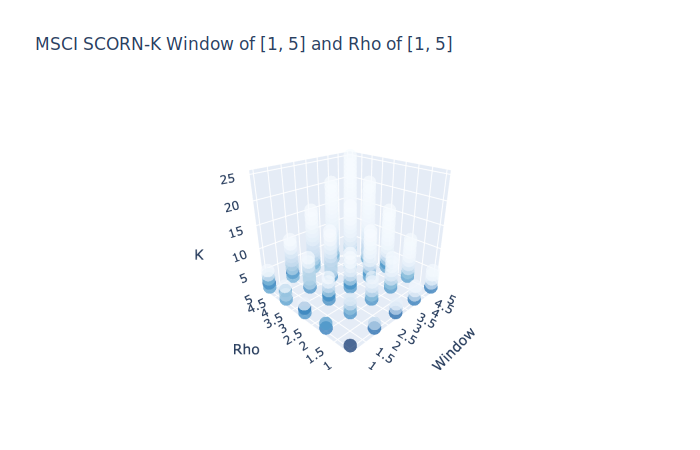

In [173]:
fig = go.Figure(data=[go.Scatter3d(x=msci_scornk['Window'], y=msci_scornk['Rho'], z=msci_scornk['K'], mode='markers',
    marker=dict(size=8, color=msci_scornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis_title='Window', yaxis_title='Rho', zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="MSCI SCORN-K Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [120]:
msci_scornk_ = SymmetricCorrelationDrivenNonparametricLearningK(window=1, rho=1, k=1)
msci_scornk_.allocate(msci, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [121]:
with open('pickled/msci_scornk_.pickle', 'wb') as fout:
    pickle.dump(msci_scornk_, fout)

### FCORN

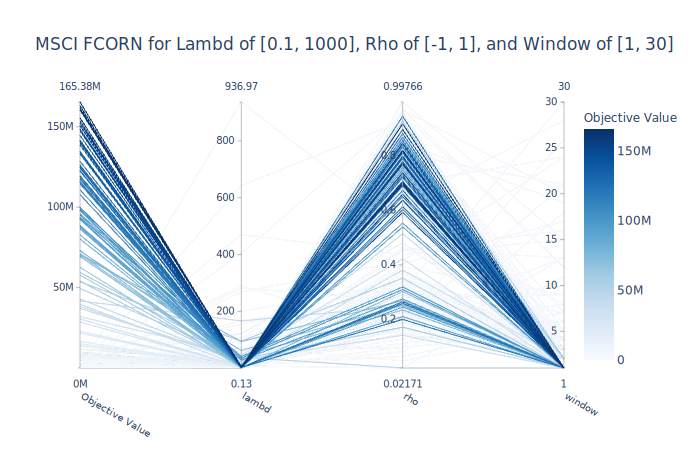

In [122]:
fig = optuna.visualization.plot_parallel_coordinate(msci_fcorn)
fig.update_layout(title_text="MSCI FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### FCORN-K

In [123]:
msci_fcornk = FunctionalCorrelationDrivenNonparametricLearningK(window=1, rho=1, lambd=1, k=1)
msci_fcornk.allocate(msci, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [124]:
with open('pickled/msci_fcornk.pickle', 'wb') as fout:
    pickle.dump(msci_fcornk, fout)

In [125]:
# Buy and Hold.
msci_bah = BuyAndHold()
msci_bah.allocate(msci)

# Constant Rebalanced Portfolio.
msci_crp = ConstantRebalancedPortfolio()
msci_crp.allocate(msci)

In [126]:
# CORN.
msci_corn_ = CorrelationDrivenNonparametricLearning(window=msci_corn.best_params['window'], rho=msci_corn.best_params['rho'])

# CORN-U.
msci_cornu_ = CorrelationDrivenNonparametricLearningUniform(window=msci_cornu.best_params['window'], rho=msci_cornu.best_params['rho'])

# SCORN.
msci_scorn_ = SymmetricCorrelationDrivenNonparametricLearning(window=msci_scorn.best_params['window'], rho=msci_scorn.best_params['rho'])

# FCORN.
msci_fcorn_ = FunctionalCorrelationDrivenNonparametricLearning(window=msci_fcorn.best_params['window'], rho=msci_fcorn.best_params['rho'], lambd=msci_fcorn.best_params['lambd'])

In [127]:
# Allocate weights.
msci_corn_.allocate(msci)
msci_cornu_.allocate(msci)
msci_scorn_.allocate(msci)
msci_fcorn_.allocate(msci)

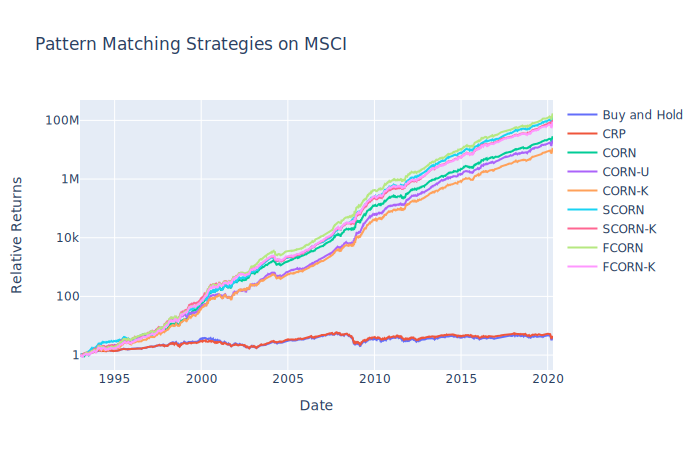

In [135]:
fig = go.Figure()
idx = msci_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=msci_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=msci_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=msci_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=msci_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=msci_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=msci_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=msci_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=msci_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=msci_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on MSCI', xaxis_title='Date', yaxis_title='Relative Returns', yaxis_type="log")
fig.show()

In [241]:
fig = go.Figure()
idx = msci_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=msci_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=msci_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=msci_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=msci_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on MSCI', xaxis_title='Date', yaxis_title='Relative Returns', yaxis_type="log")
fig.show()

## US Equity: 2011-2020

In [136]:
# Load Optuna Study.
equity_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/equity.db')
equity_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/equity.db')
equity_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/equity.db')
equity_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/equity.db')

### CORN

In [301]:
import mlfinlab

In [302]:
model = CORN(window=2, rho=0)

In [303]:
model.allocate(us_equity, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [304]:
model.all_weights.tail()

AAPL  ABT  AMGN      AMZN  AXP  BAC  BRK-A    C  CAT  \
Date                                                                   
2020-04-21  0.000000  0.0   0.0  0.000000  0.0  0.0    0.0  0.0  0.0   
2020-04-22  0.000000  0.0   1.0  0.000000  0.0  0.0    0.0  0.0  0.0   
2020-04-23  0.489216  0.0   0.0  0.510784  0.0  0.0    0.0  0.0  0.0   
2020-04-24  0.000000  0.0   1.0  0.000000  0.0  0.0    0.0  0.0  0.0   
2020-04-27  0.000000  0.0   0.0  0.000000  0.0  0.0    0.0  0.0  0.0   

               CMCSA  ...   PG   PM  QCOM  SLB    T  UPS  USB  WFC  WMT  XOM  
Date                  ...                                                     
2020-04-21  0.020534  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-04-22  0.000000  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-04-23  0.000000  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-04-24  0.000000  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-04-27  0.000000  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 44 columns]

In [305]:
model.portfolio_return

Returns
Date                 
2011-01-03   1.000000
2011-01-04   1.002099
2011-01-05   1.007820
2011-01-06   1.014134
2011-01-07   1.016917
...               ...
2020-04-21  12.518541
2020-04-22  12.439334
2020-04-23  12.512422
2020-04-24  12.716396
2020-04-27  13.050817

[2344 rows x 1 columns]

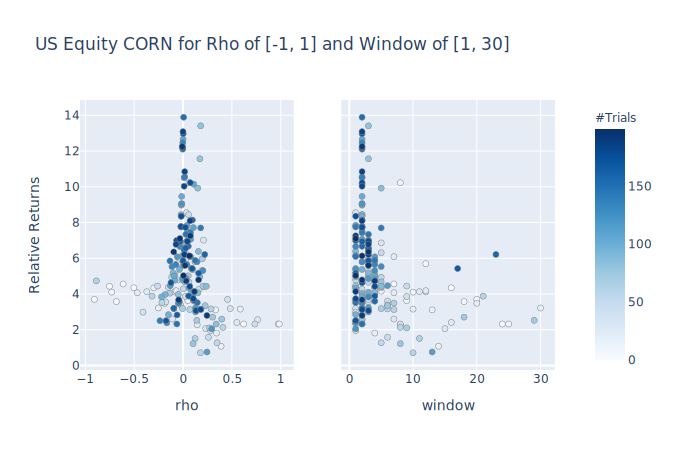

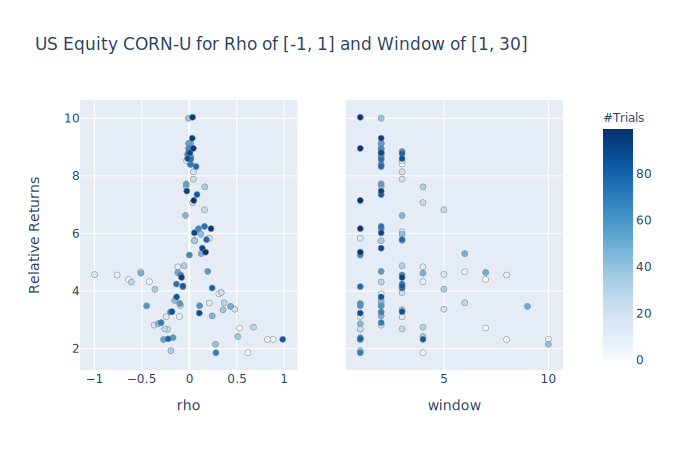

In [137]:
fig = optuna.visualization.plot_slice(equity_corn)
fig.update_layout(title_text="US Equity CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

fig = optuna.visualization.plot_slice(equity_cornu)
fig.update_layout(title_text="US Equity CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### CORN-K

In [174]:
with open('pickled/equity_cornk.pickle', 'rb') as fout:
    equity_cornk = pickle.load(fout)
equity_cornk = pd.DataFrame(equity_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [175]:
equity_cornk.head()

Window  Rho    K    Returns
36     2.0  5.0  2.0  11.046960
10     1.0  5.0  1.0  10.785977
76     3.0  5.0  2.0  10.117304
64     3.0  4.0  2.0   9.277006
45     3.0  1.0  1.0   9.142067

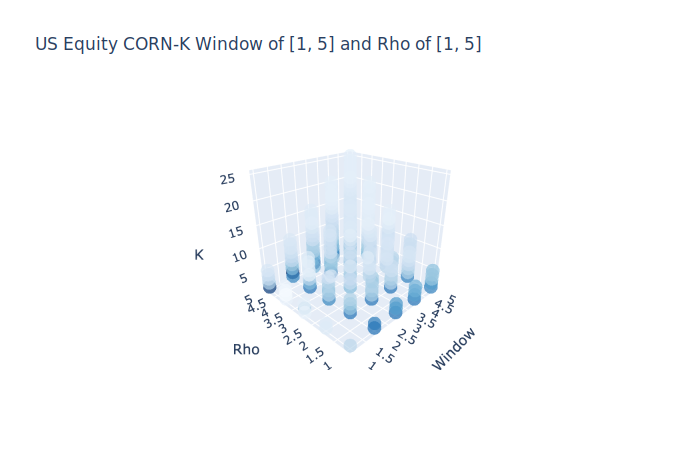

In [179]:
fig = go.Figure(data=[go.Scatter3d(x=equity_cornk['Window'], y=equity_cornk['Rho'], z=equity_cornk['K'], mode='markers',
    marker=dict(size=8, color=equity_cornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis_title='Window', yaxis_title='Rho', zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="US Equity CORN-K Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [177]:
equity_cornk_ = CorrelationDrivenNonparametricLearningK(window=2, rho=5, k=2)
equity_cornk_.allocate(us_equity, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


### SCORN

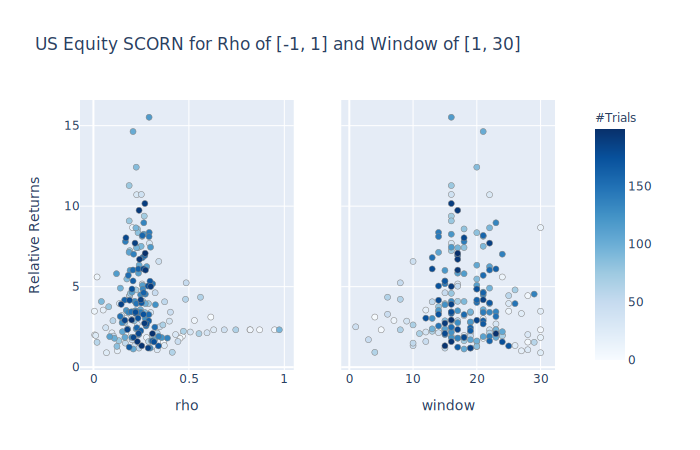

In [138]:
fig = optuna.visualization.plot_slice(equity_scorn)
fig.update_layout(title_text="US Equity SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### SCORN-K

In [139]:
with open('pickled/equity_scornk.pickle', 'rb') as fout:
    equity_scornk = pickle.load(fout)
equity_scornk = pd.DataFrame(equity_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [140]:
equity_scornk.head()

Window  Rho    K    Returns
16      2.0  1.0  2.0  10.153985
130     4.0  5.0  1.0  10.013314
46      3.0  1.0  2.0   9.929112
151     5.0  1.0  2.0   8.990811
18      2.0  2.0  2.0   8.977606

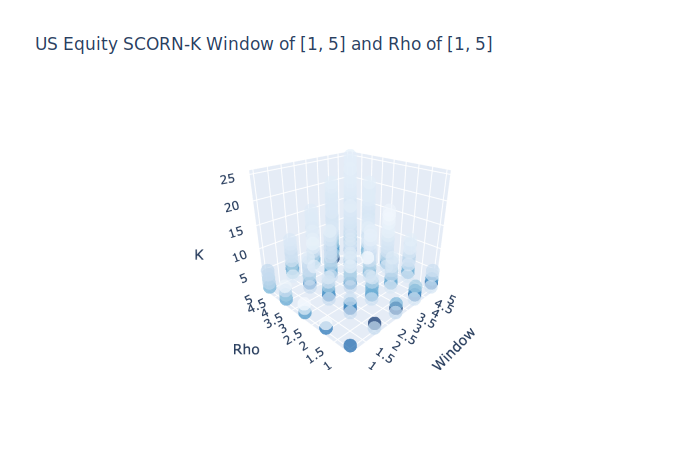

In [178]:
fig = go.Figure(data=[go.Scatter3d(x=equity_scornk['Window'], y=equity_scornk['Rho'], z=equity_scornk['K'], mode='markers',
    marker=dict(size=8, color=equity_scornk['Returns'], colorscale='blues', opacity=0.7))])

fig.update_layout(scene=dict(xaxis_title='Window', yaxis_title='Rho', zaxis_title='K'))
camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
fig.update_layout(scene_camera=camera, title="US Equity SCORN-K Window of [1, 5] and Rho of [1, 5]")
fig.show()

In [142]:
equity_scornk_ = SymmetricCorrelationDrivenNonparametricLearningK(window=2, rho=1, k=2)
equity_scornk_.allocate(us_equity, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [143]:
with open('pickled/equity_scornk_.pickle', 'wb') as fout:
    pickle.dump(equity_scornk_, fout)

### FCORN

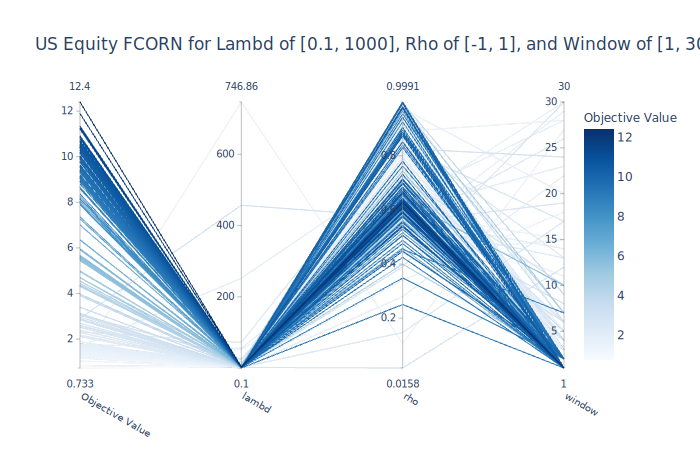

In [144]:
fig = optuna.visualization.plot_parallel_coordinate(equity_fcorn)
fig.update_layout(title_text="US Equity FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### FCORN-K

In [146]:
equity_fcornk = FunctionalCorrelationDrivenNonparametricLearningK(window=2, rho=1, lambd=1, k=2)
equity_fcornk.allocate(us_equity, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [147]:
with open('pickled/equity_fcornk.pickle', 'wb') as fout:
    pickle.dump(equity_fcornk, fout)

In [148]:
# Buy and Hold.
equity_bah = BuyAndHold()
equity_bah.allocate(us_equity)

# Constant Rebalanced Portfolio.
equity_crp = ConstantRebalancedPortfolio()
equity_crp.allocate(us_equity)

In [149]:
# CORN.
equity_corn_ = CorrelationDrivenNonparametricLearning(window=equity_corn.best_params['window'], rho=equity_corn.best_params['rho'])

# CORN-U.
equity_cornu_ = CorrelationDrivenNonparametricLearningUniform(window=equity_cornu.best_params['window'], rho=equity_cornu.best_params['rho'])

# SCORN.
equity_scorn_ = SymmetricCorrelationDrivenNonparametricLearning(window=equity_scorn.best_params['window'], rho=equity_scorn.best_params['rho'])

# FCORN.
equity_fcorn_ = FunctionalCorrelationDrivenNonparametricLearning(window=equity_fcorn.best_params['window'], rho=equity_fcorn.best_params['rho'], lambd=equity_fcorn.best_params['lambd'])

In [150]:
# Allocate weights.
equity_corn_.allocate(us_equity)
equity_cornu_.allocate(us_equity)
equity_scorn_.allocate(us_equity)
equity_fcorn_.allocate(us_equity)

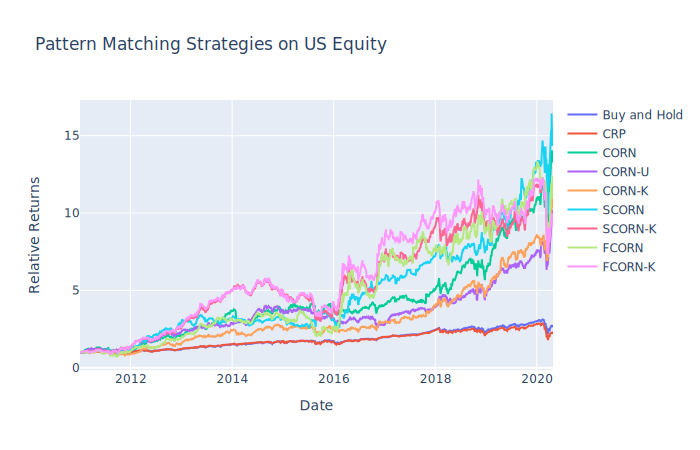

In [213]:
fig = go.Figure()
idx = equity_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=equity_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=equity_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=equity_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=equity_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=equity_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=equity_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=equity_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=equity_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=equity_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on US Equity', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

In [269]:
fig = go.Figure()
idx = equity_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=equity_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=equity_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=equity_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=equity_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=equity_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=equity_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on US Equity', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

## Conclusion

Mean reversion can be formulated in multiple methods. From a simple constant rebalanced portfolio to a complex robust median reversion, the strategy can employ endless techniques to find the most profitable set of portfolio weights. The blog post covered a wide range of mean reversion strategies employed in MlFinLab’s newest Online Portfolio Selection module, and readers will be able to replicate results using the simple methods of the new module.

The next notebook will focus on Pattern Matching.

If you enjoyed reading this please remember to leave us a star on [GitHub](https://github.com/hudson-and-thames) and become a sponsor on [Patreon](https://www.patreon.com/HudsonThames) to have exclusive access to our Slack channel!

- Reference 1: [Online Portfolio Selection](https://books.google.com/books/about/Online_Portfolio_Selection.html?id=R2fdCgAAQBAJ)
- Reference 2: [PAMR: Passive-Aggressive Mean Reversion Strategy for Portfolio Selection](https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?article=3295&context=sis_research)
- Reference 3: [Confidence Weighted Mean Reversion Strategy for Online Portfolio Selection](https://dl.acm.org/doi/pdf/10.1145/2435209.2435213)
- Reference 4: [Online Portfolio Selection for Moving Average Reversion](https://arxiv.org/pdf/1206.4626.pdf)
- Reference 5: [Robust Median Reversion Strategy for Online Portfolio Selection](https://www.ijcai.org/Proceedings/13/Papers/296.pdf)